# Chapter 09: Plotting and Visualization

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
print('OK')

OK


## 9.1 A Brief `matplotlib` API Primer

> ***Example - Simple plot***

In [122]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

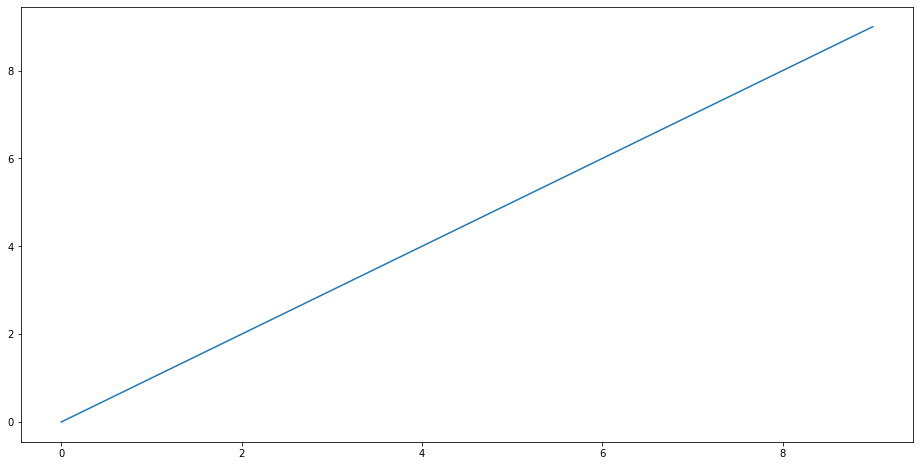

In [123]:
plt.plot(data)

### Figures and Subplots

- Plots in `matplotlib` reside within a **Figure** objects (`plt.figure()` return a new **Figure**)
- We can't make a plot with a *blank figure*. We have to create one or more **subplots** using `add_subplot()`

> ***Example - Create plots in a `Figure` objects***

In [124]:
fig = plt.figure()
fig # In Jupyter Notebook, nothing will be shown unlike IPython

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

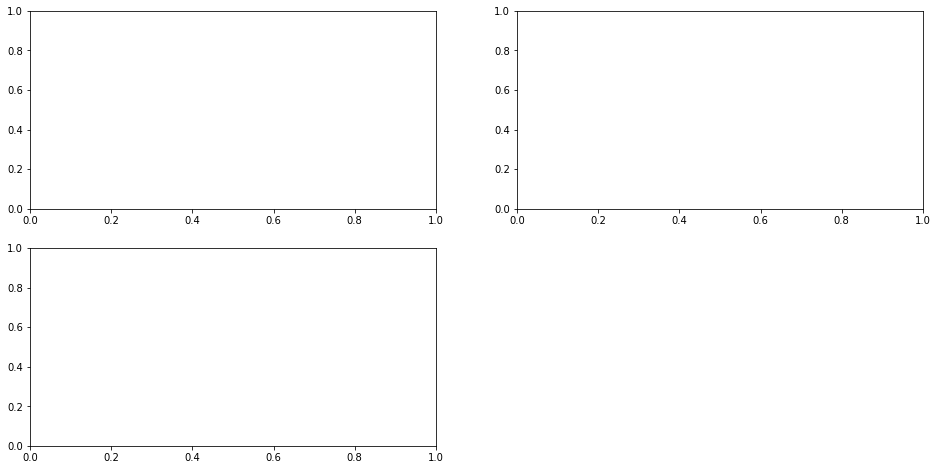

In [125]:
ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# Figure will be 2 x 2 <=> can hold up to 4 subplots. 
# The third argument, number 1,2, and 3 indicate the position of the subplot on figure
fig

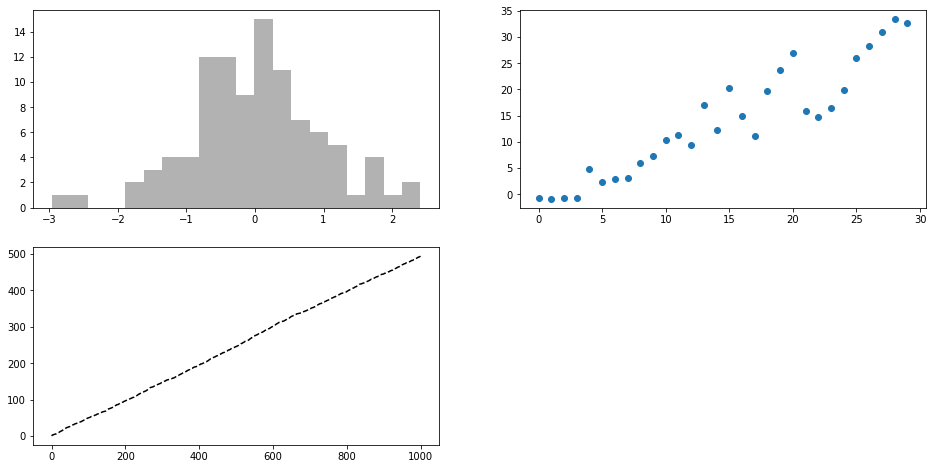

In [126]:
ax1.hist(np.random.randn(100), bins=20, color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.rand(1000).cumsum(),'k--')

fig

- `pyplot.subplots()` options

| Argument | Description |
|----------|-------------|
| nrows | Number of rows of subplots |
| ncols | Number of columns of subplots |
| sharex | All subplots should use the same x-axis ticks (adjusting the `xlim` will affect all subplots)|
| sharey | All subplots should use the same y-axis ticks (adjusting the `ylim` will affect all subplots)|
| subplot_kw | Dictionary of keywords passed to `add_subplots()` call used to create each subplot |
| \*\*fig_kw | Additional keywords to `subplots` are used when creating the figure|

#### Adjusting the spacing around subplots

- By default, `matplotlib` leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if we resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself.
- We can change the spacing using `subplots_adjust()` method on **Figure** objects

```Python
subplots_adjust(left=None, bottom=None, right=None, top=None
               wspace=None, hspace=None)
```

- `wspace` & `hspace` controls the percent of the figure width and figure height

> ***Example - Using subplots_adjust()***

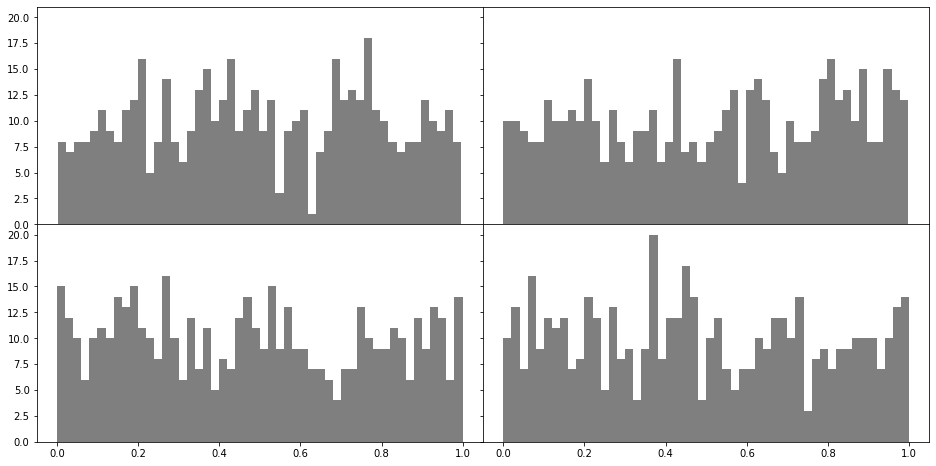

In [127]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) # Return new figure and also the axes
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

- `Matplotlib`'s main `plot` function accepts arrays of x & y coordinates and optionally a string abbreviation indicating color & line style

- Thre are a number of color abbreviation provided for commonly used colors and also color in hex code can be used as well.

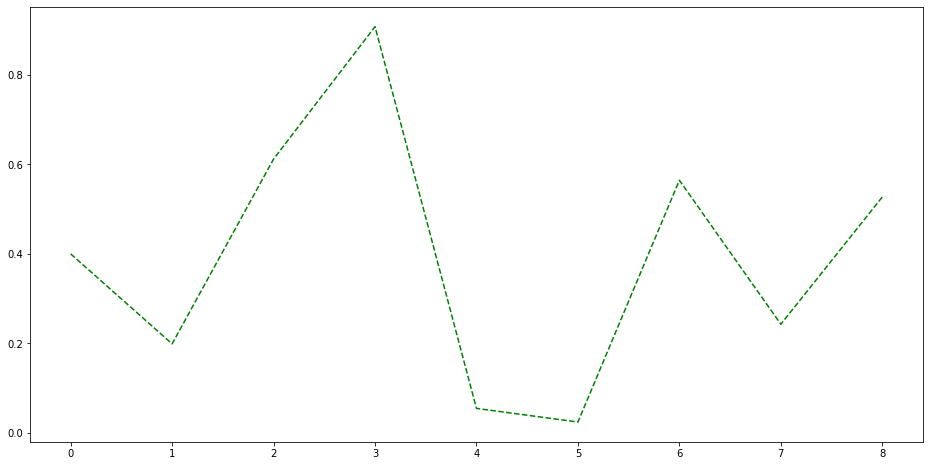

In [128]:
plt.plot(np.random.rand(9), 'g--')  # Green color & dash line, short form => convenient
# Long form => more details: plt.plot(x, linestyle='--', color='g')

- Line plots can additionally have `markers` to highlight the actual data points. The marker can be a part of the style string, which must have color followed by marker type and line style.

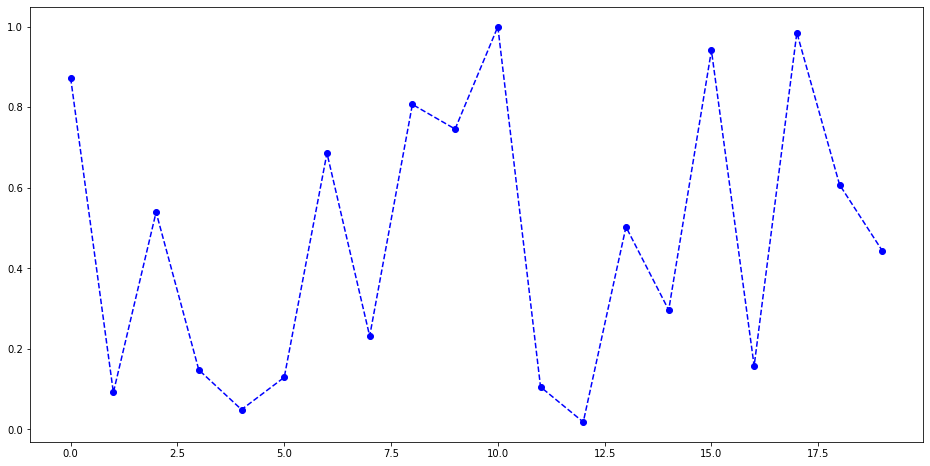

In [129]:
plt.plot(np.random.rand(20), 'bo--') # Blue color, dash line & dot markers, short form
# Long form: plt.plot(np.random.rand(20), color='b', linestyle='dashed', marker='o')

###  Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

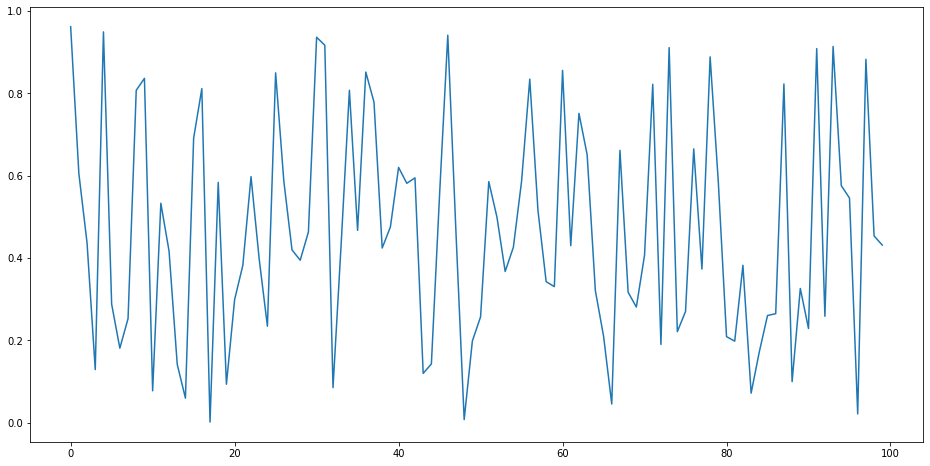

In [130]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.rand(100))

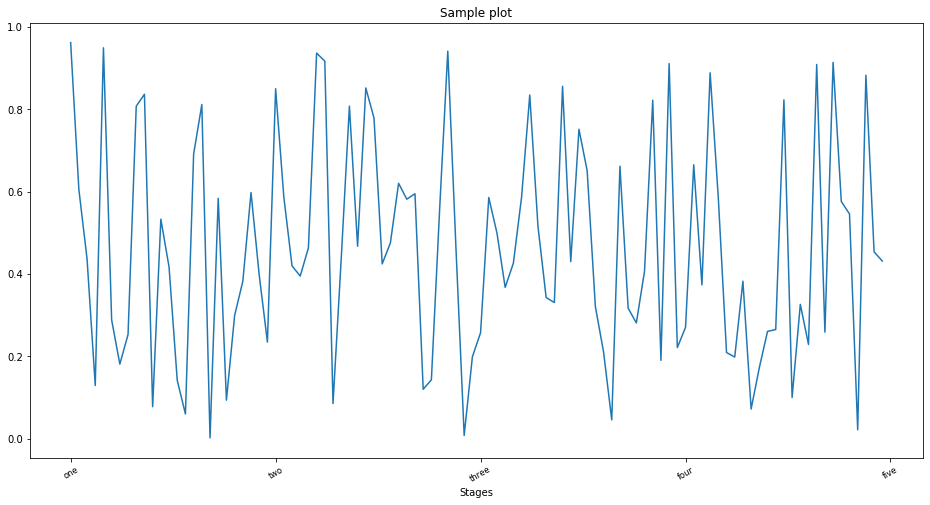

In [131]:
# Modify title, labels, etc.
ticks = ax.set_xticks([25*i for i in range(5)])
labels = ax.set_xticklabels('one two three four five'.split(' '), rotation=30,fontsize='small')
ax.set_title('Sample plot')
ax.set_xlabel('Stages')
fig

#### Adding legends

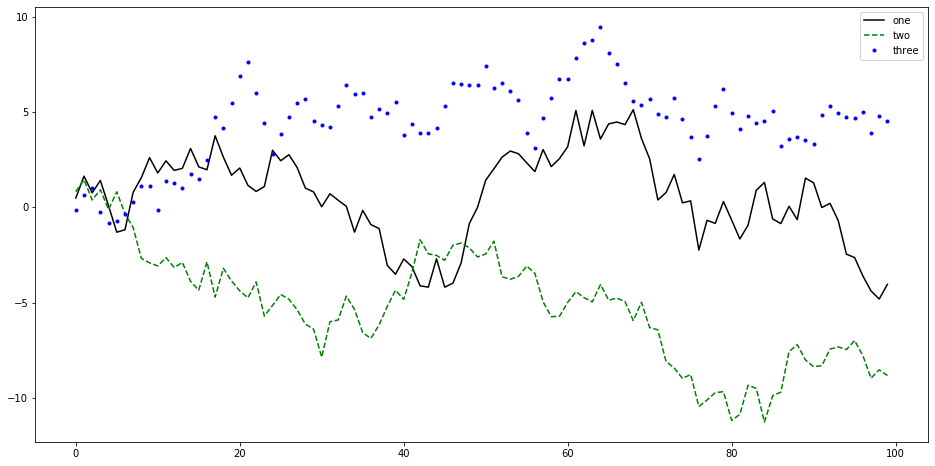

In [132]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(100).cumsum(), 'k', label='one')
ax.plot(np.random.randn(100).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(100).cumsum(), 'b.', label='three')
ax.legend(loc='best')

## Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

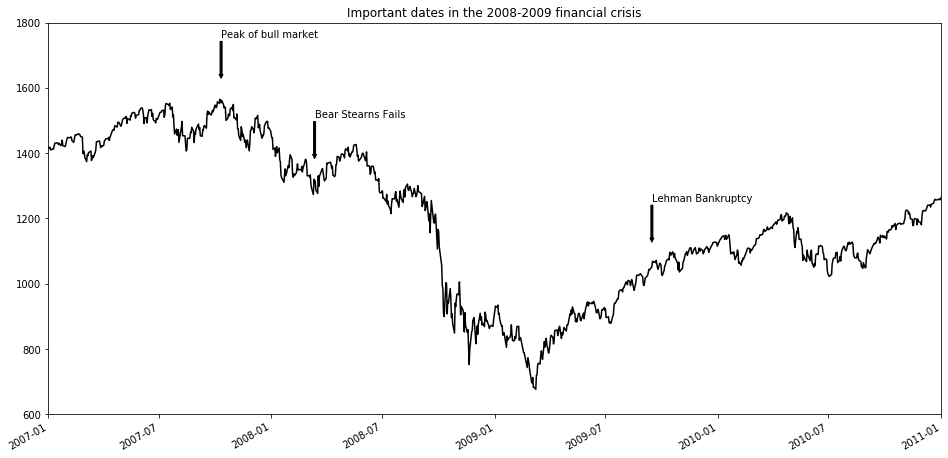

In [133]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Read data
data = pd.read_csv(r'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv', 
                   index_col=0,
                   parse_dates=True)
spx = data['SPX']

# Plotting
spx.plot(ax=ax, style='k-')
crisis_data = [(pd.Timestamp(year=2007, month=10, day=11), 'Peak of bull market'),
               ((pd.Timestamp(year=2008, month=3, day=12), 'Bear Stearns Fails')),
               ((pd.Timestamp(year=2009, month=9, day=15), 'Lehman Bankruptcy'))]
for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', 
                verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

### Saving Plots to File

- Use `plt.savefig()` <=> `<Figure Object>.savefig()`
- `savefig()` options

| Argument | Description |
|----------|-------------|
| fname | String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g. .pdf for PDF, .png for PNG)
| dpi | The figure resoluton in dots per inch; defaults to 100 out of the but canbe configures
| facecolor,<br>edgecolor | The color of the figure background outstide of the subplot; `w` (white) by default
| format | the explicit file format to use (`png`, `pdf`, etc.)
| bbox_inches | The portion of the figure to save; if `tight` is passed, will attempt to trim the empty space around the figure

### `matplotlib` Configuration

- `matplotlib` comes configured with color schemes and defaults the are geared primarily toward preparing figures for publication.
- Nearly all of the default behavior can be customized via an extensive set of global parameters.
- Use `plt.rc()` to modify the configuration programmatically.

## 9.2 Plotting with `pandas` & `matplotlib`

**Note:** I will skip the session about `seaborn` in this chapter

- `Series.plot()` method arguments

| Argument | Description |
|----------|-------------|
| label | Label for plot legend |
| ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot |
| style | style string to passed to matplotlib (e.g. 'ko--')
| alpha | The plot fill opacity (0 --> 1)
| kind | Can be `area`, `bar`, `barh`, `density`, `hist`,`kde`, `line`, `pie`
| logy | Use logarithmic scaling on the y-axis 
| use_index | Use the object index for tick labels
| rot | Rotation of tick label (0 --> 360)
| xticks | Values to use for x-axis ticks
| yticks | Values to use for y-axis ticks
| xlim | x-axis limits
| ylim | y-axis limits
| grid | Display axis grid

- `DataFrame.plot()` argunebts

| Argument | Description |
|----------|-------------|
| subplots | Plot each DataFrame column in a separate subplot 
| sharex | If subplots=True, share the same x-axis, linking ticks and limits
| sharey | If subplots=True, share the same y-axis
| figsize | Size of figure to create as tuple
| title | Plot title as string
| legend | Add a subplot legend
| sort_columns | Plot columns in alphabetical order

### Line Plots

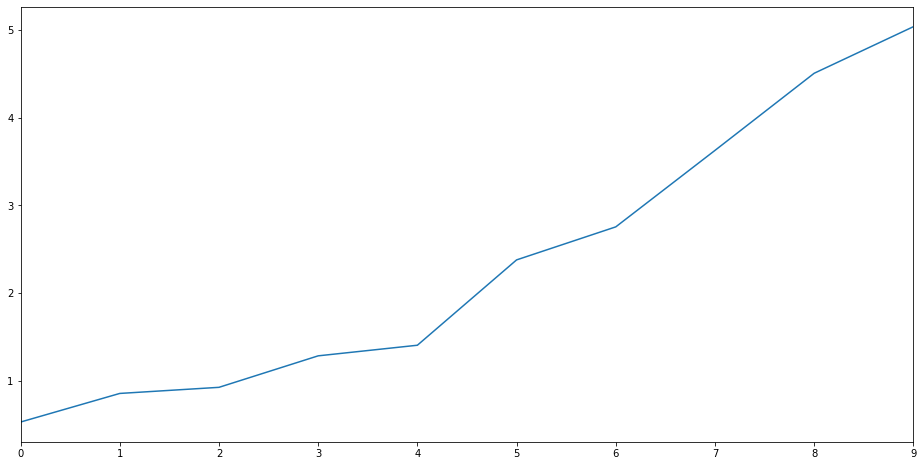

In [134]:
# Line plot - Series
s = pd.Series(np.random.rand(10).cumsum())
s.plot()

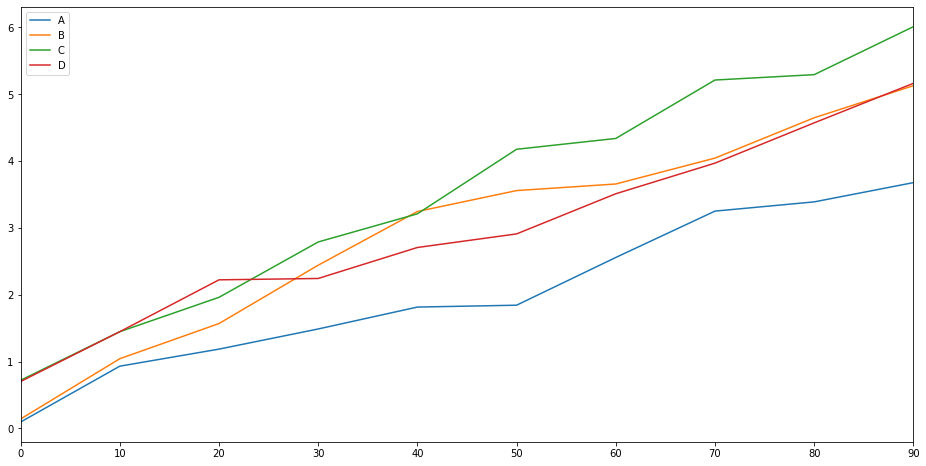

In [143]:
# Line Plots - DataFrame
df = pd.DataFrame(np.random.rand(10, 4).cumsum(0),
                  columns=list('ABCD'), 
                  index=np.arange(0,100,10))
df.plot()

### Bar Plots

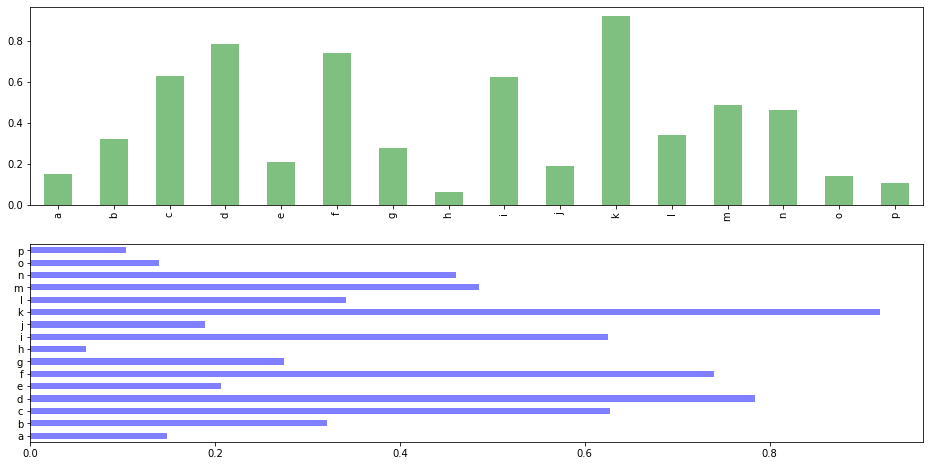

In [136]:
# Bar plot & Horizontal Bar Plot - Series
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='g', alpha=0.5)
data.plot.barh(ax=axes[1], color='b', alpha=0.5)

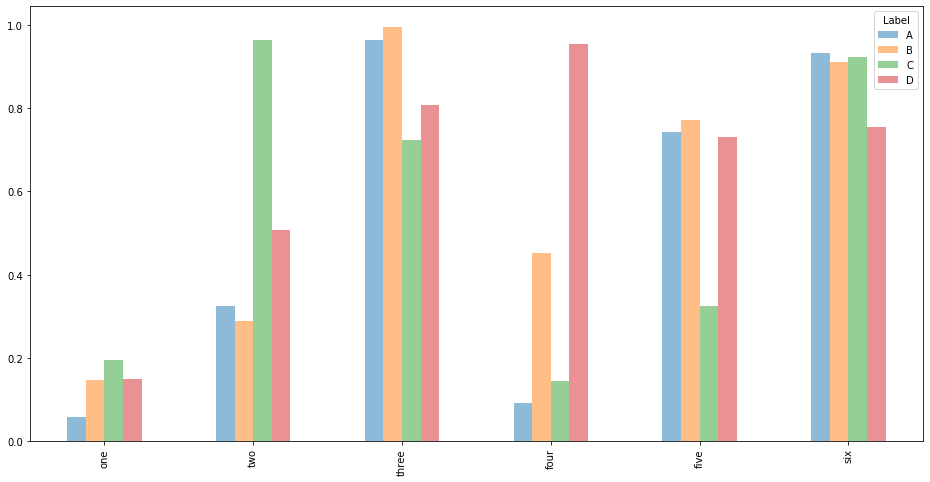

In [137]:
# Bar plot - DataFrame
df = pd.DataFrame(np.random.rand(6,4), 
                  index='one two three four five six'.split(' '), 
                  columns=pd.Index(list('ABCD'), name='Label'))
df.plot.bar(alpha=0.5)

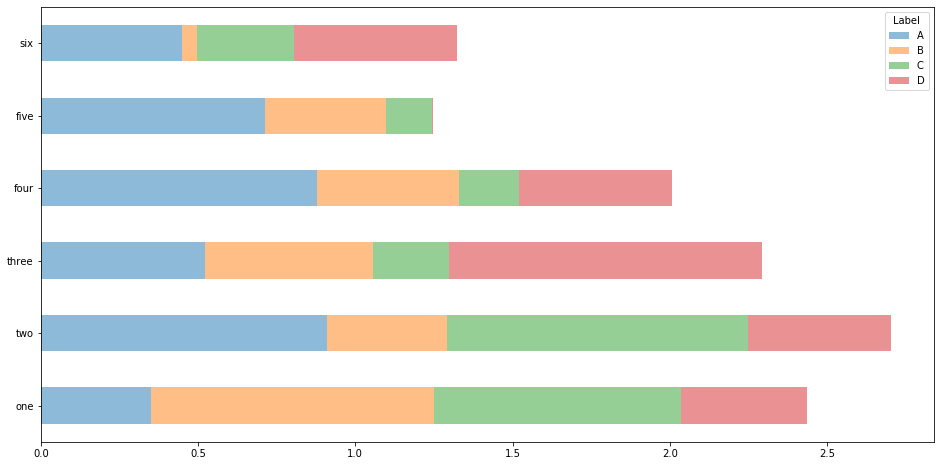

In [138]:
# Stacked Bar Plot - DataFrame
df = pd.DataFrame(np.random.rand(6,4), 
                  index='one two three four five six'.split(' '), 
                  columns=pd.Index(list('ABCD'), name='Label'))
df.plot.barh(stacked=True, alpha=0.5)

### Histograms and Density Plots

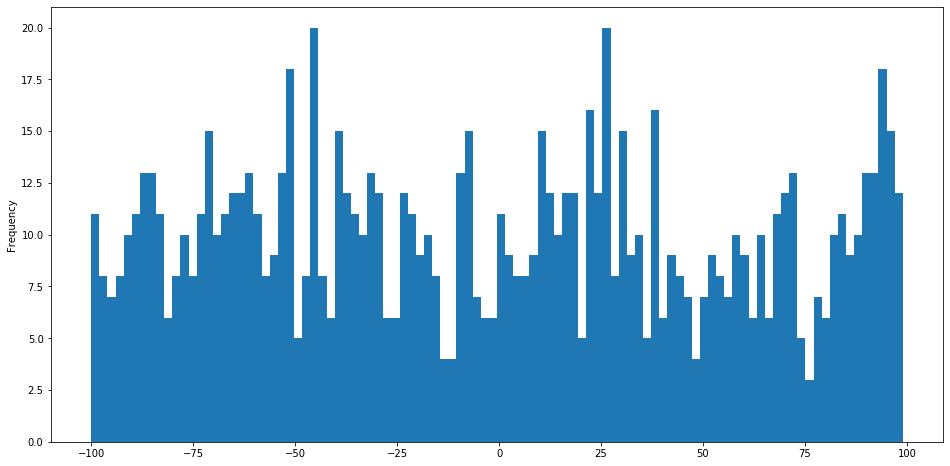

In [139]:
# Histograms Plot
s = pd.Series(np.random.randint(-100, 100, 1000))
s.plot.hist(bins=100)

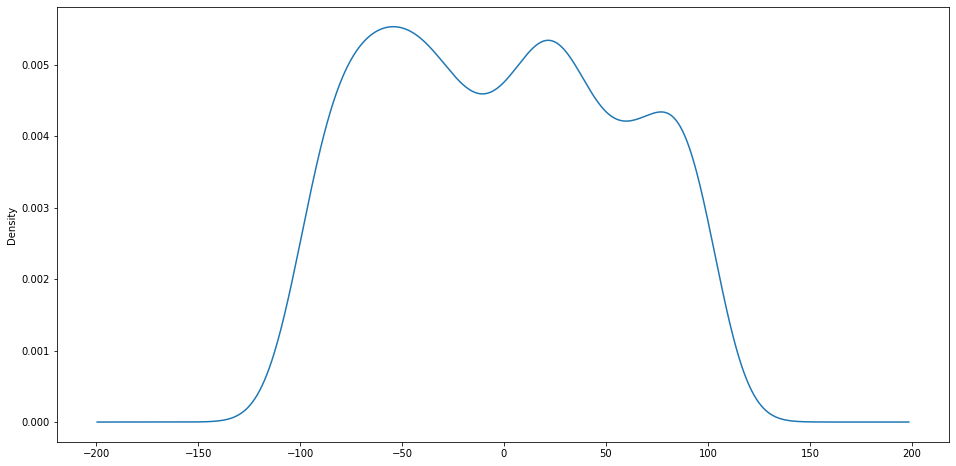

In [140]:
# Density plots
s.plot.density()

### Scatter or Point Plots

In [141]:
# Scatter Plot
macro = pd.read_csv(r'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

transdata = np.log(data).diff().dropna()
transdata.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


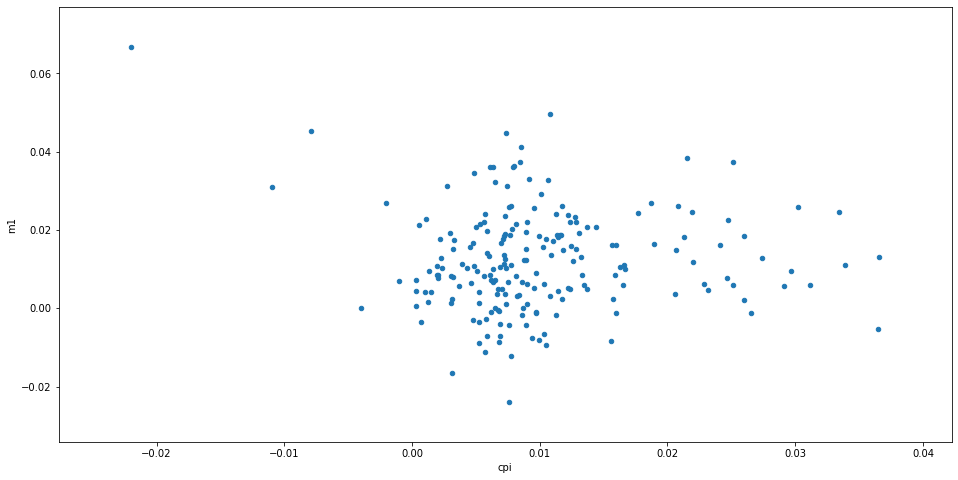

In [142]:
transdata.plot.scatter('cpi', 'm1')